Learning Logistic Regression

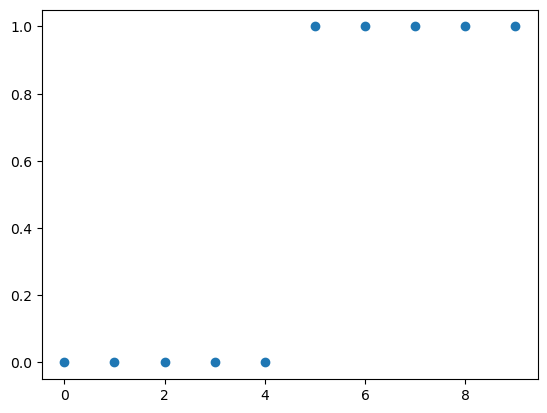

In [64]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0, 10, 1)
y = np.array([0 if i < 5 else 1 for i in range(10)])
plt.scatter(x, y)

In [325]:
import math
import random

def initialize_random_weights():
    return random.random(), random.random()

def forward_pass(x, weight, bias):
    return 1/(1 + np.exp(-weight * x - bias))

def log_loss(preds, reals):
    preds_clipped = np.clip(preds, 1e-15, 1 - 1e-15)
    return (np.dot(reals, -np.log(preds_clipped)) + np.dot(1-reals, -np.log(1-preds_clipped))) / len(preds)

def dj_dw(x, y, preds):
    return np.sum((preds - y) * x) / len(preds)
    
def dj_db(y, preds):
    return np.sum(preds - y) / len(preds)

def backward_pass(preds, x, y, weight, bias, alpha):
    tmp_w = weight - alpha * dj_dw(x, y, preds)
    tmp_b = bias - alpha * dj_db(y, preds)

    return tmp_w, tmp_b

In [248]:
def test_loss():
    preds = np.array([0.5, 0.2, 0.9])
    reals  = np.array([1, 0, 1])
    real = -math.log(0.5) - math.log(0.8) - math.log(0.9)
    loss = log_loss(preds, reals)
    assert real/3.0 == loss

test_loss()

Understanding the loss function

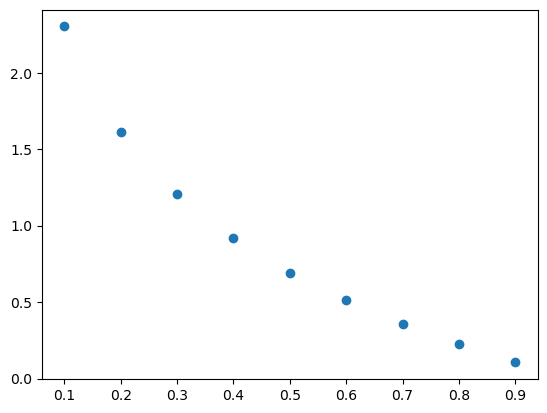

In [74]:
test_x = np.arange(0.1, 1, 0.1)
test_log = -np.log(test_x)

# loss decreases the closer the value is to one
plt.scatter(test_x, test_log)
plt.show()

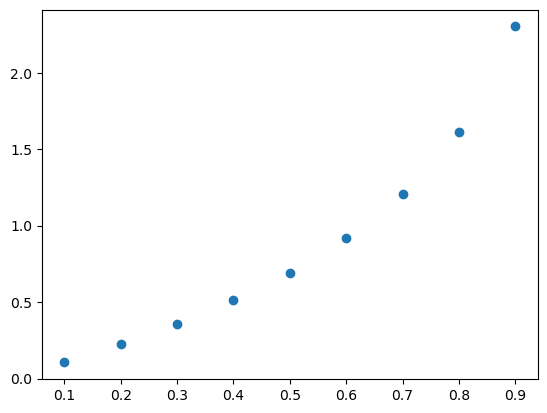

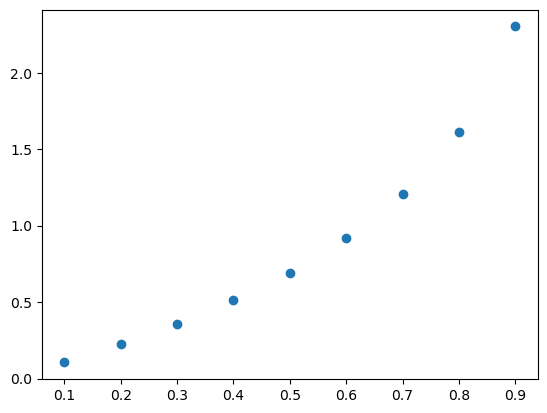

In [68]:
test_log2 = -np.log(1-test_x)

# loss decreases when you are closer to 0
plt.scatter(test_x, test_log2)
plt.show("")

0.12857912741682012


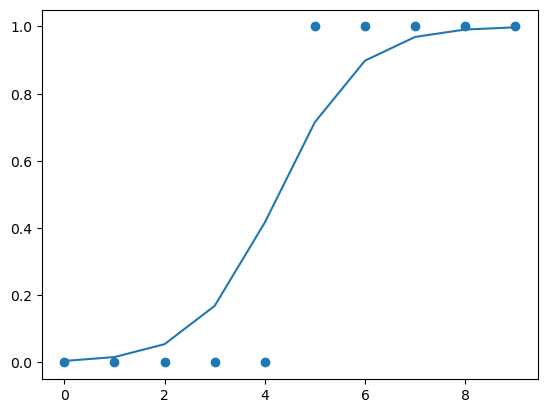

In [339]:
weight, bias = initialize_random_weights()
losses = []
num_epochs = 1000
for i in range(num_epochs):
    pred = forward_pass(x, weight, bias)
    loss = log_loss(pred, y)
    losses.append(loss)
    weight, bias = backward_pass(pred, x, y, weight, bias, alpha=0.5)

print(loss)
plt.scatter(x, y)
plt.plot(pred)


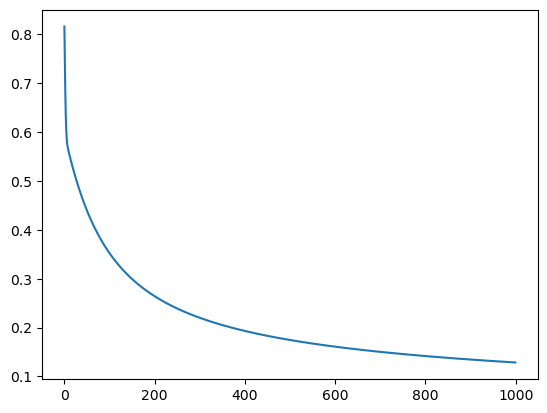

In [340]:
plt.plot(losses)